In [1]:
import os
from os.path import join
import sys
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Overall l/r bias
Test whether there is an overall left vs right bias in the cursor behavior. This is a control test for the left/right eye bias that we see in face stimuli

**Note**: "left" is relative to the viewer

In [3]:
# load the combined cursorTracking data for all subjs
df = pd.read_table('../../data/groupData/allSubjsRaw.tsv', sep='\t')

In [4]:
df.shape

(608261, 7)

### Select the stimuli to include in the analysis
Choose the non-face and non-face-like stimuli

In [5]:
# function to label the image categories
def labelStimCategory(row):
    if "_images707/simpleFood" in row['stim']:
        label = 'portrait'
    elif "_images707/art/stillLife_" in row['stim']:
        label = 'stillLife'
    else:
        label = "Na"
    
    return label

In [6]:
# add image category label to dataframe
df['stimCategory'] = df.apply(labelStimCategory, axis=1)

In [7]:
# make sure this worked
df['stimCategory'].unique()

array(['Na', 'stillLife', 'portrait'], dtype=object)

In [8]:
# drop the NAs
df = df[df['stimCategory'] != 'Na']
df.shape

(74169, 8)

In [9]:
# write this out as a txt file so you don't have to load the big file again
df.to_csv('overallBias_allSubjsRaw.tsv', sep='\t', index=False)

In [10]:
df.head()

,ts,x,y,subjID,stim,trialNum,AOI,stimCategory
293,51,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife
294,68,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife
295,85,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife
296,102,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife
297,119,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife


---

### Label each datapoint according to which half of the image it lies on
In order to know what half of the image each datapoint falls on, have to know the dimensions of each stim (all stims are 707x565, but they are either landscape or portrait oriented). Step one is to make a table of image dimensions for each stim

In [11]:
stims = np.unique(df.stim)
stims

array(['_images707/art/stillLife_10.jpg',
       '_images707/art/stillLife_11.jpg',
       '_images707/art/stillLife_15.jpg',
       '_images707/art/stillLife_16.jpg', '_images707/art/stillLife_3.jpg',
       '_images707/simpleFood/simpleFood_1.jpg',
       '_images707/simpleFood/simpleFood_10.jpg',
       '_images707/simpleFood/simpleFood_11.jpg',
       '_images707/simpleFood/simpleFood_12.jpg',
       '_images707/simpleFood/simpleFood_2.jpg',
       '_images707/simpleFood/simpleFood_3.jpg',
       '_images707/simpleFood/simpleFood_4.jpg',
       '_images707/simpleFood/simpleFood_5.jpg',
       '_images707/simpleFood/simpleFood_6.jpg',
       '_images707/simpleFood/simpleFood_7.jpg',
       '_images707/simpleFood/simpleFood_8.jpg',
       '_images707/simpleFood/simpleFood_9.jpg'], dtype=object)

In [12]:
import matplotlib.image as mpimg

In [19]:
stimDirRoot = '../../stimuli/'
widths = np.array([], dtype=int32)
heights = np.array([], dtype=int32)
for s in stims:
    # open image
    thisStim = mpimg.imread(join(stimDirRoot, s))
    
    heights = np.append(heights, int(thisStim.shape[0]))
    widths = np.append(widths, int(thisStim.shape[1]))

stimSize = pd.DataFrame({'stim':stims, 'width':widths, 'height':heights}, columns=['stim', 'height', 'width'])
stimSize

,stim,height,width
0,_images707/art/stillLife_10.jpg,566,707
1,_images707/art/stillLife_11.jpg,566,707
2,_images707/art/stillLife_15.jpg,707,566
3,_images707/art/stillLife_16.jpg,566,707
4,_images707/art/stillLife_3.jpg,566,707
5,_images707/simpleFood/simpleFood_1.jpg,707,566
6,_images707/simpleFood/simpleFood_10.jpg,707,567
7,_images707/simpleFood/simpleFood_11.jpg,707,566
8,_images707/simpleFood/simpleFood_12.jpg,707,566
9,_images707/simpleFood/simpleFood_2.jpg,707,566


In [20]:
# function to label left or right
def left_vs_right(row):
    # get relevant values from this row
    stimName = row['stim']
    x = row['x']
    
    # look up this stim in stimSize table and get width
    stimWidth = stimSize[stimSize.stim == stimName]['width'].item()
    
    if x <= stimWidth/2:
        label = 'left'
    else:
        label = 'right'
    
    return label
    

In [21]:
df['leftRight'] = df.apply(left_vs_right, axis=1)

In [22]:
df.head()

,ts,x,y,subjID,stim,trialNum,AOI,stimCategory,leftRight
293,51,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife,left
294,68,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife,left
295,85,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife,left
296,102,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife,left
297,119,88.0,157.5,27235,_images707/art/stillLife_16.jpg,2,NaN,stillLife,left


---
### Calculate within trial amount of time spent in each image half (left/right)
For each trial for each subject, calculate the time per image half. The time per half is calculated by taking the mean frame interval across that trial (i.e. the mean interval between successive timestamps) and multiplying it by the number of frames labeled for each half (left or right).

In [26]:
# create a table showing the mean frame interval on each trial
trialFrameTimes = df.groupby(['subjID', 'trialNum'], as_index=False).ts.agg(lambda x: x.diff().mean())
trialFrameTimes.head(10)

,subjID,trialNum,ts
0,741,35,26.783784
1,1164,35,26.216931
2,20649,27,25.811518
3,20649,29,25.302564
4,27235,2,17.187500
5,27235,31,25.505155
6,27537,27,25.942408
7,27537,29,25.647668
8,29147,2,24.770000
9,29147,31,25.085859


In [29]:
# create a table showing the number of datapoints labeled for each half
ptsPerHalf = df.groupby(['subjID', 'trialNum', 'leftRight'], as_index=False).ts.agg(lambda x: len(x))
ptsPerHalf.head(10)

,subjID,trialNum,leftRight,ts
0,741,35,left,95
1,741,35,right,91
2,1164,35,left,49
3,1164,35,right,141
4,20649,27,left,112
5,20649,27,right,80
6,20649,29,left,96
7,20649,29,right,100
8,27235,2,left,203
9,27235,2,right,86


In [30]:
# function to calculate time per half
def calculateTimePerHalf(row):
    # get the mean froma interval for this trial
    meanFrameInterval = trialFrameTimes[(trialFrameTimes.subjID == row['subjID']) &
                            (trialFrameTimes.trialNum == row['trialNum'])]['ts'].item()
    
    # multiply the mean frame interval by the number of frames
    totalTime = meanFrameInterval * row['ts']
    return totalTime

In [31]:
ptsPerHalf['totalTime'] = ptsPerHalf.apply(calculateTimePerHalf, axis=1)
ptsPerHalf.head(10)

,subjID,trialNum,leftRight,ts,totalTime
0,741,35,left,95,2544.459459
1,741,35,right,91,2437.324324
2,1164,35,left,49,1284.629630
3,1164,35,right,141,3696.587302
4,20649,27,left,112,2890.890052
5,20649,27,right,80,2064.921466
6,20649,29,left,96,2429.046154
7,20649,29,right,100,2530.256410
8,27235,2,left,203,3489.062500
9,27235,2,right,86,1478.125000


In [34]:
# basic cleanup and reformatting
df_byHalf = ptsPerHalf.copy()
df_byHalf = df_byHalf.rename(columns={'ts':'numFrames'})
df_byHalf.head(10)

,subjID,trialNum,leftRight,numFrames,totalTime
0,741,35,left,95,2544.459459
1,741,35,right,91,2437.324324
2,1164,35,left,49,1284.629630
3,1164,35,right,141,3696.587302
4,20649,27,left,112,2890.890052
5,20649,27,right,80,2064.921466
6,20649,29,left,96,2429.046154
7,20649,29,right,100,2530.256410
8,27235,2,left,203,3489.062500
9,27235,2,right,86,1478.125000


---
### Calculate the left vs right bias score for each trial
calculate the total "right" > "left" time as the bias score. This way, left biases are negative values

In [98]:
def halfBias(group):
    if 'left' not in group['leftRight'].values:
        leftTime = 0
    else:
        leftTime = group[group.leftRight == 'left']['totalTime'].item()
        
    if 'right' not in group['leftRight'].values:
        rightTime = 0
    else:
        rightTime = group[group.leftRight == 'right']['totalTime'].item()
    
    # calculate bias
    bias = rightTime - leftTime
    
    return bias

In [110]:
biasByTrial = df_byHalf.groupby(['subjID', 'trialNum']).apply(halfBias).reset_index()
biasByTrial.head()

,subjID,trialNum,0
0,741,35,-107.135135
1,1164,35,2411.957672
2,20649,27,-825.968586
3,20649,29,101.210256
4,27235,2,-2010.937500


In [118]:
# calculate within subj averages
biasBySubj = biasByTrial.groupby('subjID', as_index=False).mean()

# cleanup
biasBySubj = biasBySubj.drop('trialNum', 1).rename(columns={0:'Bias'})

biasBySubj.head()


,subjID,Bias
0,741,-107.135135
1,1164,2411.957672
2,20649,-362.379165
3,27235,-916.200709
4,27537,-724.324255


### Add gender and handedness to the dataframe

In [124]:
dem_data = pd.read_table('../../data/groupData/AbsFace Demographics_May 11, 2017_19.30.csv', sep=',')

In [125]:
dem_data = dem_data[['Q1', 'Q2', 'Q3', 'Q15']]

In [151]:
def labelGender(row):
    "find the gender based on subjID"

    subjID = str(row['subjID']) # get the subjID
    
    # grab the row with the subject's demographic data
    subj_dem = dem_data[dem_data.Q1.str.find(subjID) == 0]
    
    return subj_dem.Q3.values[0]


def labelHandedness(row):
    "find the handedness based on subjID"
    subjID = str(row['subjID']) # get the subjID
    
    # grab the row with the subject's demographic data
    subj_dem = dem_data[dem_data.Q1.str.find(subjID) == 0]
    
    return subj_dem.Q15.values[0]

In [153]:
biasBySubj['gender'] = biasBySubj.apply(labelGender, axis=1)
biasBySubj['handedness'] = biasBySubj.apply(labelHandedness, axis=1)

biasBySubj.head(10)

,subjID,Bias,gender,handedness
0,741,-107.135135,Male,Right-handed
1,1164,2411.957672,Male,Right-handed
2,20649,-362.379165,Female,Left-handed
3,27235,-916.200709,Female,Right-handed
4,27537,-724.324255,Female,Right-handed
5,29147,-1959.198939,Female,Right-handed
6,31758,-670.570312,Male,Right-handed
7,35414,1192.472626,Female,Left-handed
8,36251,-1444.646275,Male,Right-handed
9,38058,695.956757,Male,Right-handed


In [154]:
biasBySubj.to_csv('leftVsRightBias_bySubj.tsv', sep='\t', index=False)

### Load data if the above steps are already done

In [155]:
biasBySubj = pd.read_table('leftVsRightBias_bySubj.tsv', sep='\t')

In [161]:
biasBySubj = biasBySubj[(biasBySubj.gender == 'Male') | (biasBySubj.gender == 'Female')]

In [173]:
biasBySubj.head()

,subjID,Bias,gender,handedness
0,741,-107.135135,Male,Right-handed
1,1164,2411.957672,Male,Right-handed
2,20649,-362.379165,Female,Left-handed
3,27235,-916.200709,Female,Right-handed
4,27537,-724.324255,Female,Right-handed


## Plotting and stats

In [117]:
sns.set_style('whitegrid')
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)

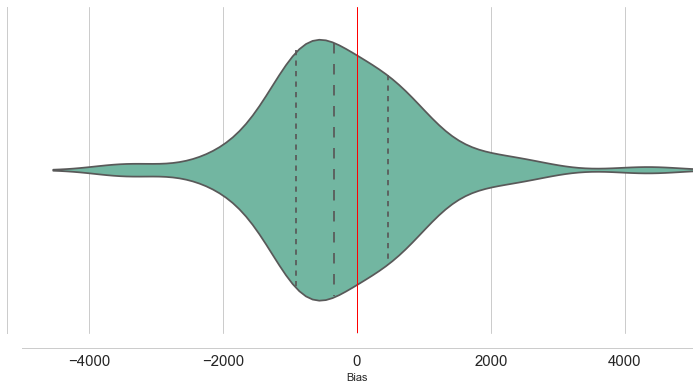

In [167]:
# overall
# plot bias
fig = plt.figure(figsize=(12,6))

sns.violinplot(x='Bias', data=biasBySubj,
               inner='quartile', palette='Set2')
sns.despine(offset=15)

plt.gca().set_xlim(-5000, 5000)

plt.axvline(x=0, lw=1, c='red')

In [169]:
import scipy.stats as stats

In [172]:
stats.ttest_1samp(biasBySubj.Bias, 0)

Ttest_1sampResult(statistic=-1.5954843689690068, pvalue=0.1140712212610818)

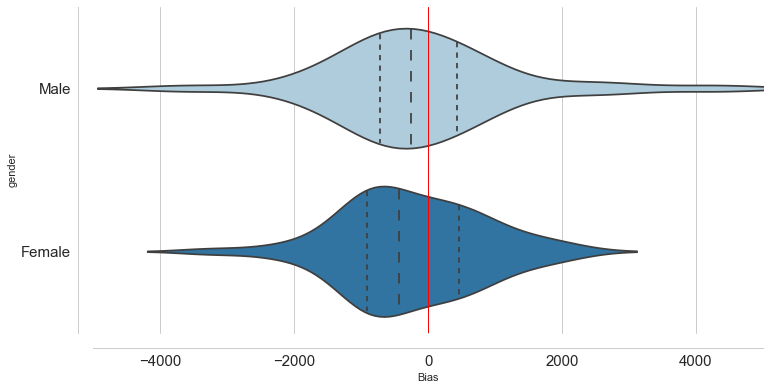

In [174]:
# plot bias
fig = plt.figure(figsize=(12,6))

sns.violinplot(x='Bias', y='gender', data=biasBySubj,
               inner='quartile', palette='Paired')
sns.despine(offset=15)

plt.gca().set_xlim(-5000, 5000)

plt.axvline(x=0, lw=1, c='red')

In [176]:
m_bias = biasBySubj[biasBySubj.gender == 'Male']['Bias']
f_bias = biasBySubj[biasBySubj.gender == 'Female']['Bias']

stats.ttest_ind(m_bias, f_bias)

Ttest_indResult(statistic=0.52383299806127093, pvalue=0.60168229908258941)